In [5]:
!git clone https://github.com/rickiepark/GDL_code.git

Cloning into 'GDL_code'...
remote: Enumerating objects: 487, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 487 (delta 1), reused 5 (delta 1), pack-reused 480
Receiving objects: 100% (487/487), 178.51 MiB | 26.17 MiB/s, done.
Resolving deltas: 100% (225/225), done.
Checking out files: 100% (77/77), done.


In [6]:
%cd GDL_code
!pip install -r requirements.txt

/content/GDL_code
     |████████████████████████████████| 96 kB 4.0 MB/s 
     |████████████████████████████████| 157 kB 45.1 MB/s 
     |████████████████████████████████| 701 kB 47.0 MB/s 
     |████████████████████████████████| 10.6 MB 38.5 MB/s 
     |████████████████████████████████| 2.8 MB 38.9 MB/s 
     |████████████████████████████████| 113 kB 52.8 MB/s 
     |████████████████████████████████| 768 kB 50.1 MB/s 
     |████████████████████████████████| 111 kB 50.1 MB/s 
     |████████████████████████████████| 177 kB 40.1 MB/s 
     |████████████████████████████████| 126 kB 52.0 MB/s 
     |████████████████████████████████| 89 kB 8.0 MB/s 
     |████████████████████████████████| 126 kB 52.0 MB/s 
     |████████████████████████████████| 312 kB 53.6 MB/s 
     |████████████████████████████████| 51 kB 572 kB/s 
     |████████████████████████████████| 59 kB 6.2 MB/s 
     |████████████████████████████████| 89 kB 7.7 MB/s 
     |████████████████████████████████| 89 kB 8.1 MB/s 
     |█

In [1]:
%cd GDL_code

/content/GDL_code


In [2]:
import os

from models.VAE import VariationalAutoencoder
from utils.loaders import load_mnist

Using TensorFlow backend.


In [3]:
SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = f'run/{SECTION}'
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir (os.path.join(RUN_FOLDER, 'weights'))

mode = 'build'

In [4]:
(x_train, y_train), (x_test, y_test) = load_mnist()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
vae = VariationalAutoencoder(
    input_dim = (28,28,1),
    encoder_conv_filters = [32, 64, 64, 64],
    encoder_conv_kernel_size = [3, 3, 3, 3],
    encoder_conv_strides = [1, 2, 2, 1],
    decoder_conv_t_filters = [64 ,64, 32, 1],
    decoder_conv_t_kernel_size = [3, 3, 3, 3],
    decoder_conv_t_strides = [1, 2, 2, 1],
    z_dim = 2
)

if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
vae.encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 28, 28, 32)   0           encoder_conv_0[0][0]             
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 14, 14, 64)   18496       leaky_re_lu_1[0][0]              
__________________________________________________________________________________________________
leaky_re_l

In [7]:
vae.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
__________

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(vae.encoder, to_file = 'vae_encoder.png', show_shapes = True, show_layer_names = True)
plot_model(vae.decoder, to_file = 'vae_decoder.png', show_shapes = True, show_layer_names = True)

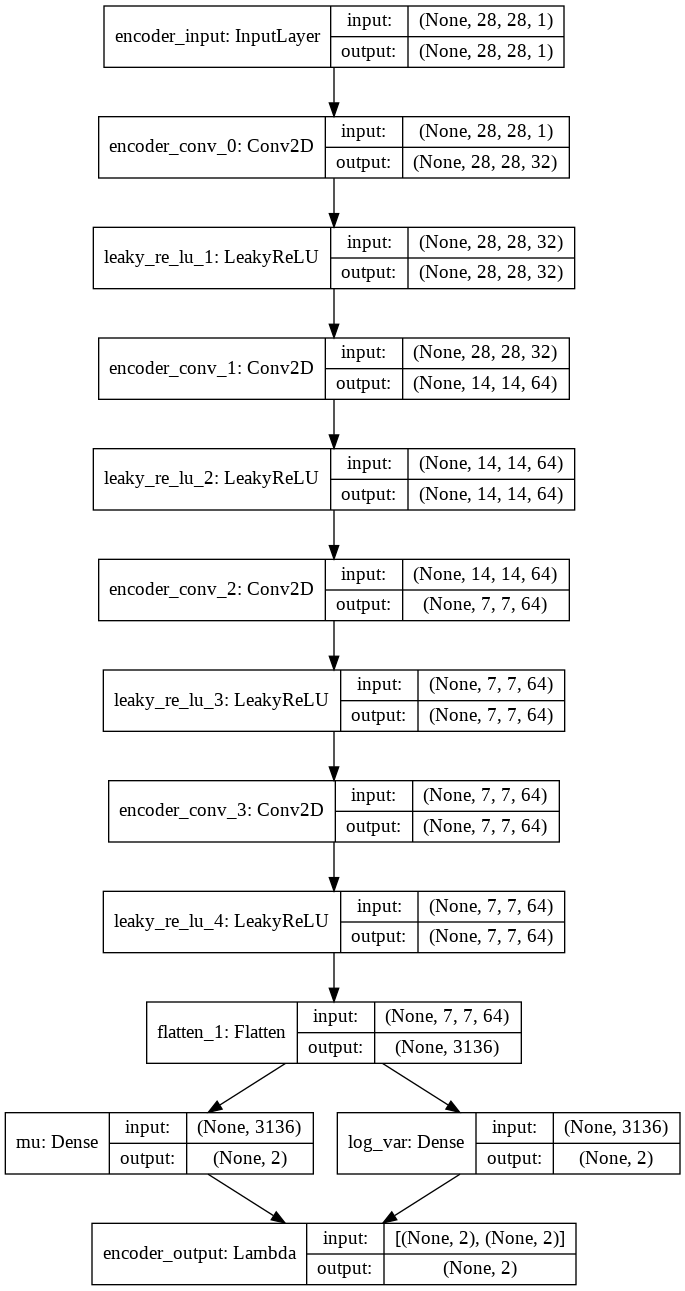

In [12]:
from IPython.display import Image
Image('/content/GDL_code/vae_encoder.png')


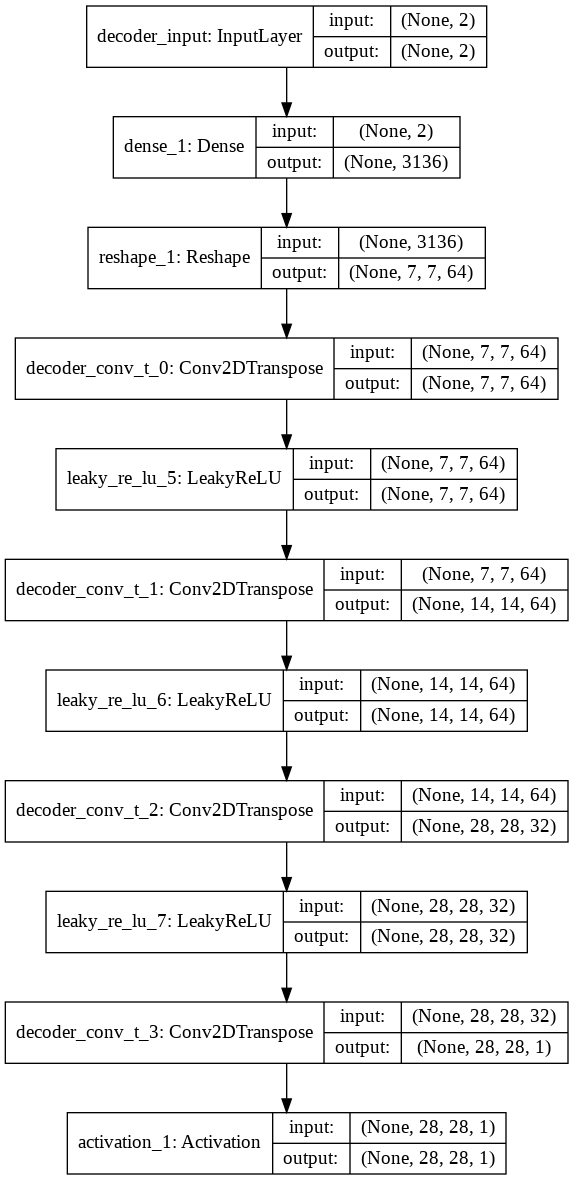

In [13]:
Image('/content/GDL_code/vae_decoder.png')

##Training

In [7]:
!pip uninstall Pillow
!pip install Pillow==6.0

Found existing installation: Pillow 5.4.1
Uninstalling Pillow-5.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/PIL/*
    /usr/local/lib/python3.7/dist-packages/Pillow-5.4.1.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled Pillow-5.4.1
     |████████████████████████████████| 2.0 MB 12.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 6.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [14]:
LEARNING_RATE = 5e-4
R_LOSS_FACTOR = 1000

In [15]:
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)

In [16]:
BATCH_SIZE = 32
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [ ]:
vae.train(
    x_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    run_folder = RUN_FOLDER,
    print_every_n_batches = PRINT_EVERY_N_BATCHES,
    initial_epoch = INITIAL_EPOCH
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
60000/60000 [==============================] - 275s 5ms/step - loss: 58.5293 - vae_r_loss: 55.2660 - vae_kl_loss: 3.2633

Epoch 00001: saving model to run/vae0002_digits/weights/weights-001-58.53.h5

Epoch 00001: saving model to run/vae0002_digits/weights/weights.h5
Epoch 2/200
60000/60000 [==============================] - 276s 5ms/step - loss: 51.9160 - vae_r_loss: 48.0456 - vae_kl_loss: 3.8703

Epoch 00002: saving model to run/vae0002_digits/weights/weights-002-51.92.h5

Epoch 00002: saving model to run/vae0002_digits/weights/weights.h5
Epoch 3/200
60000/60000 [==============================] - 275s 5ms/step - loss: 50.4363 - vae_r_loss: 46.2523 - vae_kl_loss: 4.1840

Epoch 00003: saving model to run/vae0002_digits/weights/weights-003-50.44.h5

Epoch 00003: saving model to run/vae0002_digits/weights/weights.h5
Epoch 4/200
60000/60000 [==============================] - 277s 5ms/step - loss: 49.4998 - vae_r_loss: 45.1375 - va